In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go

### Reference Materials

* jupyter labextension install jupyterlab-plotly

* https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html

* https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html

* https://github.com/Pierian-Data/Plotly-Dashboards-with-Dash

### 1

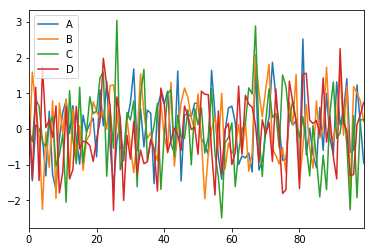

In [2]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.plot()
plt.show()

In [3]:
pyo.plot([{
    'x': df.index,
    'y': df[col]
} for col in df.columns.values])

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/temp-plot.html'

### 2 Scatter

In [47]:
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101, 100)

In [72]:
data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
    marker = {
        'symbol' : 'hexagon',
        'size' : 10,
        'color' : 'green',
        'line' : {
            'width' : 4,
            'color': 'black'
        }
    }
)]

Layout = go.Layout(
    title = "Test Scatter Plot",
    xaxis = dict(title="Random X", color="cyan"),
    yaxis = dict(title="Random Y", color="red"),
    hovermode = "closest"
)

fig = go.Figure(data=data, layout=Layout)

pyo.plot(fig)

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 3 Line

In [73]:
random_x = np.linspace(0,100,100)
random_y = np.random.randn(100)

In [79]:
trace1 = go.Scatter(
    x = random_x,
    y = random_y+5,
    mode = "markers",
    name = "markers"
)

trace2 = go.Scatter(
    x = random_x,
    y = random_y,
    mode = "lines+markers",
    name = "lines+markers"
)

trace3 = go.Scatter(
    x = random_x,
    y = random_y-5,
    mode = "lines",
    name = "lines"
)

data = [trace1, trace2, trace3]

In [80]:
pyo.plot(data)

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 4 Bar

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/2018WinterOlympics.csv')

In [91]:
data = go.Bar(
    x=df['NOC'],
    y=df['Total']
)

layout = go.Layout(
    title = "Sample Bar Chart",
    xaxis = {
        'categoryorder': 'total descending'
    }
)

figure = go.Figure(data=[data], layout=layout)

In [103]:
pyo.iplot(figure)

In [107]:
trace1 = go.Bar(
    x=df['NOC'],
    y=df['Gold'],
    name="Gold",
    marker = {
        'color':'#FFD700'
    }
)

trace2 = go.Bar(
    x=df['NOC'],
    y=df['Silver'],
    name="Silver",
    marker = {
        'color':'#9EA0A1'
    }
)

trace3 = go.Bar(
    x=df['NOC'],
    y=df['Bronze'],
    name="Bronze",
    marker = {
        'color':'#CD7F32'
    }
)

figure = go.Figure(
    data = [trace1, trace2, trace3],
    layout = go.Layout(
        barmode='stack',
        title='Stacked Bar',
        xaxis={
            'categoryorder': 'total descending'
        }
    )
)

pyo.plot(figure)

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 5 Bubble

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/mpg.csv')

In [119]:
data = go.Scatter(
    x = df['horsepower'],
    y = df['mpg'],
    text = df['name'],
    mode='markers',
    marker={
        'size': 1.5*df['cylinders']
    }
)

layout = go.Layout(
    title = "Sample Bubble Chart",
    hovermode='closest'
)

pyo.plot(go.Figure(data=[data], layout=layout))

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 6 Box

In [126]:
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]


data = [
    go.Box(
        y = y,
        name = "Temp",
        boxpoints = 'all', # 'outlier to show only the outliers'
        jitter = 0.3,
        pointpos = 0
    )
]

In [131]:
snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

data = [
    go.Box(
        y=snodgrass,
        name='QCS'
    ),
    go.Box(
        y=twain,
        name='MT'
    )
]
layout = go.Layout(
    title = 'Comparison of three-letter-word frequencies<br>\
    between Quintus Curtius Snodgrass and Mark Twain'
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 7 Histogram

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/mpg.csv')

In [141]:
data = [
    go.Histogram(
        x=df['mpg'],
        xbins={
            'start':8,
            'end':50,
            'size':1 ### this is bin width and not the number of bins, so (50-8)/size = number of bins
        }
    )
]

layout = go.Layout(
    title="Miles Per Gallon"
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

In [142]:
df = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/arrhythmia.csv')

In [154]:
data = [
    go.Histogram(
        x = df[df['Sex']==1]['Height'],
        name = "Male",
        opacity = 0.75
    ),
    
    go.Histogram(
        x = df[df['Sex']==0]['Height'],
        name = "Female",
        opacity = 0.75
    )
]

layout = go.Layout(
    title="Male vs Female Height",
    barmode="overlay"
)

pyo.plot(go.Figure(data=data, layout=layout))

'file:///Users/franklemuchahary/Documents/Data Science/Plotly/1/temp-plot.html'

### 8 Denstiy

In [155]:
import plotly.figure_factory as ff